# Summary Project Description

Projek ini merupakan projek yang ditujukan sebagai Tugas Pertama di kelas **Data Science Internship** di **PT Hacktivate Teknologi Indonesia**. Projek ini akan menganalisis data *London Crime LSOA* dalam rentang Januari 2008 - Desember 2016. Data ini adalah data sekunder yang diperoleh dari situs Kaggle.com <br>
Siswa diminta untuk memformulasi sebuah pertanyaan, menjawabnya dengan visualisasi data serta menarik kesimpulan informasi. <br>
Projek ini dibuat dengan memperhatikan segala rubrik penilaian yang telah ditetapkan pengajar sebelumnya.

# Install Required Libraries

# Import Required Libraries

In [23]:
#untuk pemrosesan data
import pandas as pd
import numpy as np

#untuk mencari lattitude dan longitude setiap wilayah
from geopy.geocoders import Nominatim

#membuat peta
import folium
from folium import plugins

# Untuk keperluan plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# untuk membuat wordcloud
from wordcloud import WordCloud



# Dataset

## Deskripsi Singkat Tentang Dataset
***
Dataset yang digunakan adalah data kejahatan di wilayah metropolitan utama, seperti kota London yang terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA, serta kategori Mayor dan Minor dari Januari 2008 sampai Desember 2016. Data ini terdiri dari 13.490.604 baris data dengan 7 kolom 

## Daftar Kolom pada data
***
1. lsoa_code = kode area polisi
2. borough = wilayah kota London yang terkait dengan data statistik
3. major_category = kategori kejahatan mayor
4. minor_category = kategori kejahatan minor
5. value = jumlah kejahatan yang terjadi di wilayah (borough) tertentu pada bulan tertentu
6. year = ringkasan tahun kejadian
7. month = ringkasan bulan kejadian

## Membaca dataset
***
Saat membaca dataset dengan pustaka *pandas* kita melewatkan parameter *missing_values* untuk dapat mengenali **Non-Standard Missing Values** pada data. Semua nilai dalam list *missing_values* akan diubah menjadi bentuk **Standar Missing Values**

In [3]:
# deteksi berbagai format non standard missing values
missing_values = ['n/a', 'na', "--", "?", "NA"]
# read dataset
df_loa_sample = pd.read_csv('london_crime_by_lsoa.csv',
                     na_values=missing_values)

# Preprocessing Dataset sebelum visualisasi
***
Hal yang dilakukan pada tahap preprocessing ini adalah: <br>
1. Mengubah nama masing-masing kolom ke Bahasa Indonesia sesuai dengan deskripsi masing-masing kolom. Hal ini dilakukan agar mempermudah proses pembuatan kode program
2. Mengetahui dimensi (baris,kolom) dari dataset
3. Mengetahui fitur/atribut/kolom apa saya yang terdapat pada dataset
4. Mengetahui apakah tipe data setiap atribut sudah sesuai atau belum
5. Mengetahui missing values yang terdapat pada dataset
> Standard missing values <br>
> Non Standard missing values <br>
> Unexpected missing values <br>
> Summarizing missing values <br>
6. Handling missing values (jika ada) dengan mengisinya dengan nilai median dari atribut yang memuat missing values


## Mengubah nama kolom

In [4]:
df_loa_sample = df_loa_sample.rename(
    columns={
        'lsoa_code': 'Kode Area',
        'borough': 'Wilayah',
        'major_category': 'Kejahatan Mayor',
        'minor_category': 'Kejahatan Minor',
        'value': 'Jumlah Kasus',
        'year': 'Tahun',
        'month': 'Bulan'
    },
)

## Mengetahui dimensi (baris, kolom) dari dataset

In [5]:
baris, kolom = df_loa_sample.shape
print("Dimensi Data")
print(baris, " baris")
print(kolom, " kolom")

Dimensi Data
13490604  baris
7  kolom


## Mengetahui fitur/atribut/kolom yang terdapat pada dataset

In [6]:
# Menampilkan sample 20 data pertama
df_loa_sample.head(20)

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [7]:
# Menampilkan daftar kolom yang ada dari dataset
columns = df_loa_sample.columns
print(columns)

Index(['Kode Area', 'Wilayah', 'Kejahatan Mayor', 'Kejahatan Minor',
       'Jumlah Kasus', 'Tahun', 'Bulan'],
      dtype='object')


### ANALISIS
***
Terdapat fitur **Kode Area, Wilayah, Kejahatan Mayor, Kejahatan Minor, Jumlah Kasus, Tahun, Bulan** yang terdeteksi

## Menyiapkan variabel global untuk keperluan nantinya
***
**years** : menampung List of years (2008 - 2016) <br>
**boroughs** : menampung List of borough atau wilayah <br>
**major_categories** : menampung List of major_categories (Kejahatan Mayor) <br>
**colors_list** : menampung List of matplotlib colors untuk keperluan plotting <br>
**months** : menampung List of range months from 1 to 12

In [8]:
# menyiapkan list 'Tahun' untuk keperluan berikutnya
years = list(map(int,np.sort(df_loa_sample['Tahun'].unique())))

# menyiapkan list 'Wilayah' untuk keperluan berikutnya
boroughs = list(df_loa_sample['Wilayah'].unique())

# menyiapkan list 'Kejahatan Mayor' untuk keperluan berikutnya
major_categories = list(df_loa_sample['Kejahatan Mayor'].unique())

# Menyiapkan color_list untuk kebutuhan visualisasi grafik
colors_list = ['darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna']

# Menyiapkan range list untuk months
months = list(range(1,13))

## Mengetahui Missing Values yang terdapat pada data

### Mengecek Standard Missing Values dan Unstandard Missing Values  untuk setiap kolom

In [9]:
for col in columns:
    print('Jumlah Standard Missing Values Pada Kolom {} adalah {}'.format(
        col, df_loa_sample[col].isnull().sum()))

Jumlah Standard Missing Values Pada Kolom Kode Area adalah 0
Jumlah Standard Missing Values Pada Kolom Wilayah adalah 0
Jumlah Standard Missing Values Pada Kolom Kejahatan Mayor adalah 0
Jumlah Standard Missing Values Pada Kolom Kejahatan Minor adalah 0
Jumlah Standard Missing Values Pada Kolom Jumlah Kasus adalah 0
Jumlah Standard Missing Values Pada Kolom Tahun adalah 0
Jumlah Standard Missing Values Pada Kolom Bulan adalah 0


#### ANALISIS
***
Tidak terdapat *standard missing values* maupun *unstandard missing values* pada dataset

## Mengetahui apakah tipe data setiap atribut sudah sesuai atau belum (Unexpected Missing Values)

In [10]:
df_loa_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Kode Area        object
 1   Wilayah          object
 2   Kejahatan Mayor  object
 3   Kejahatan Minor  object
 4   Jumlah Kasus     int64 
 5   Tahun            int64 
 6   Bulan            int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### ANALISIS
Berdasarkan hasil di atas, ada dua tipe data major yang digunakan untuk beberapa kolom. <br>
1. Tipe data string (str) <br>
> Tipe data  ini digunakan untuk kolom [**Kode Area, Wilayah, Kejahatan Major, Kejahatan Minor**] <br>
2. Tipe data integer (int) <br>
> Tipe data ini digunakan untuk kolom [**Jumlah Kasus, Tahun, Bulan**] <br>


In [11]:
# Mengetahui nilai unique setiap kolom untuk menentukan data dengan tipe anomali
string_columns = ['Kode Area', 'Wilayah', 'Kejahatan Mayor', 'Kejahatan Minor']
integer_columns = ['Jumlah Kasus', 'Tahun', 'Bulan']

for string_col in string_columns:
    print('Nilai Unik Untuk Kolom ', string_col)
    print("[", end='')
    for unique_val in df_loa_sample[string_col].unique():
        print(unique_val, end=', ')
    print("]")
    print("="*30)

Nilai Unik Untuk Kolom  Kode Area


[E01001116, E01001646, E01000677, E01003774, E01004563, E01001320, E01001342, E01002633, E01003496, E01004177, E01001985, E01003076, E01003852, E01004547, E01002398, E01002358, E01000086, E01003708, E01002945, E01004195, E01003651, E01004660, E01001786, E01001432, E01001301, E01001794, E01002195, E01001201, E01001972, E01003325, E01001317, E01002634, E01000733, E01032741, E01002533, E01000503, E01002006, E01002595, E01003067, E01003947, E01002360, E01003583, E01001029, E01001193, E01000280, E01004436, E01004678, E01003064, E01003238, E01000713, E01001206, E01000606, E01002022, E01000869, E01000455, E01001171, E01003211, E01033083, E01000893, E01002858, E01002678, E01003191, E01002977, E01000510, E01003989, E01002122, E01000808, E01003019, E01004346, E01002772, E01004048, E01003547, E01000172, E01000586, E01032513, E01001600, E01003744, E01001787, E01002013, E01004165, E01003738, E01001738, E01004254, E01000996, E01001863, E01002804, E01003483, E01002193, E01000507, E01000723, E01001807

, E01003029, E01003527, E01000790, E01001601, E01002714, E01003683, E01004073, E01004148, E01002516, E01003305, E01001234, E01003666, E01000686, E01001923, E01004484, E01004682, E01002935, E01003369, E01000532, E01000594, E01001099, E01002381, E01004612, E01003160, E01001360, E01000016, E01001334, E01003694, E01032765, E01003215, E01001160, E01000373, E01000831, E01000003, E01001824, E01001303, E01002441, E01003102, E01000024, E01000792, E01003161, E01000782, E01003593, E01001176, E01000512, E01002382, E01002270, E01003767, E01003517, E01003866, E01002153, E01004219, E01002028, E01001844, E01002512, E01000068, E01004711, E01003700, E01004594, E01004094, E01004694, E01001088, E01000646, E01002419, E01002402, E01004079, E01002140, E01001532, E01000439, E01004388, E01001359, E01000190, E01001457, E01002413, E01001657, E01003783, E01001941, E01002600, E01001000, E01001281, E01001536, E01000758, E01002699, E01000349, E01000803, E01001492, E01000703, E01000423, E01002042, E01000063, E0100084

In [12]:
for int_col in integer_columns:
    print('Nilai Unik Untuk Kolom', int_col)
    print(df_loa_sample[int_col].unique())
    print("="*30)

Nilai Unik Untuk Kolom Jumlah Kasus
[  0   1   2   3   4   9   5   6   7  10  18  11  16   8  72  12  53  14
  19  15  17  20  43  50  37  57  21  13  80  25  28  22  58  33  29  38
  88  23 111  40  39  60  26  48  32  66 122  47  30 118  75  54  51  67
  45  35  24 117  27  68  99  65  84  34  55  81 112 119  71 113  36  61
  46  31  59  44 149  49 241 104  69  77  41  64  42 167  73  74 165 107
  86  52  63  79 103 106  70  90  91 148 130  62 136  98  92 141  78  82
  56 194 168 152 204 114 153 116 157 131 120  96 101  97  95 309 142  87
 146 195  93 166 144  94 161 135 170  76 127 210  83 150 186 156 124  85
 174 221 163 109 110  89 115 138 140 121 139 105 129 177 237 235 226 199
 240 189 280 100 102 288 134 244 211 158 187 137 123 164 108 224 201 233
 132 220 126 154 133 257 178 214 147 229 176 202 230 155 162 160 203 248
 215 172 192 208 232 197 173 216 205 180 151 184 179 243 188 228 159 254
 267 247 196 181 193 260 169 281 212 183 128 217 143 239 200 249 125 253
 145 185 190 28

### ANALISIS
Berdasarkan hasil pengecekan nilai unik untuk setiap kolom bertipe string dan setiap kolom bertipe integer, semua nilai unik yang terdeteksi sudah diisi dengan nilai yang seharusnya diisi dan tidak adanya anomali tipe data pada setiap kolom tersebut. Tidak terdapat *unexpected missing values*

## Summarizing All Missing Values

In [13]:
print("Total keseluruhan missing values = ",
      df_loa_sample.isnull().sum().sum())

Total keseluruhan missing values =  0


### ANALISIS
Karena tidak terdapat *missing values*, maka proses imputasi *missing values* bisa dilewatkan

## Membuat DataFrame baru sesuai kebutuhan

### DataFrame untuk melihat Total Kasus Kejahatan Untuk Kejahatan Mayor tiap Tahun
***
Struktur dataframe ini yaitu: <br>
*index* diisi dengan kategori kejahatan mayor <br>
*columns* diisi dengan rentang tahun dari 2008 - 2016. Sebagai tambahan kolom 'Total' adalah penjumlah total kasus kejahatan untuk axis=1

In [14]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Kejahatan Mayor', summing 'Jumlah Kasus'
    majorcat_per_tahun = df_loa_sample[
        df_loa_sample['Tahun'] == year
    ].groupby('Kejahatan Mayor')['Jumlah Kasus'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, majorcat_per_tahun.reset_index()['Jumlah Kasus'].values),
        index=majorcat_per_tahun.index
    )

# Membuat dataframe dengan 'Kejahatan Mayor' sebagai index dan years sebagai columns
df_crime_majorcat_years = pd.DataFrame(
    columns=years,
    index=major_categories,
    data=data
)
df_crime_majorcat_years['Total'] = df_crime_majorcat_years[years].sum(axis=1)

# urutkan data berdasarkan Total dari tertinggi ke terendah
df_crime_majorcat_years.sort_values(by='Total', ascending=False, inplace=True)

In [15]:
# tampilkan 5 data teratas
df_crime_majorcat_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


### DataFrame untuk melihat Total Kasus Kejahatan Untuk Setiap Wilayah tiap Tahun

In [16]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Wilayah', summing 'Jumlah Kasus'
    wilayah_per_tahun = df_loa_sample[
        df_loa_sample['Tahun'] == year
    ].groupby('Wilayah')['Jumlah Kasus'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, wilayah_per_tahun.reset_index()['Jumlah Kasus'].values),
        index=wilayah_per_tahun.index
    )

# Membuat dataframe dengan 'Wilayah' sebagai index dan years sebagai columns
df_crime_boroughs_years = pd.DataFrame(
    columns=years,
    index=boroughs,
    data=data
)
df_crime_boroughs_years['Total'] = df_crime_boroughs_years[years].sum(axis=1)

# urutkan data berdasarkan 'Total' dari tertinggi ke terendah
df_crime_boroughs_years.sort_values(by='Total', ascending=False, inplace=True)

In [17]:
# Menampilkan 5 data teratas dari df_crime_boroughs_years
df_crime_boroughs_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


### DataFrame untuk melihat Total Kasus Kejahatan untuk setiap bulan tiap tahun

In [18]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Bulan', summing 'Jumlah Kasus'
    crime_year_month = df_loa_sample[
        (df_loa_sample['Tahun'] == year)
    ].groupby('Bulan')['Jumlah Kasus'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, crime_year_month.reset_index()['Jumlah Kasus'].values),
        index=crime_year_month.index
    )

# Membuat dataframe dengan 'Month' sebagai index dan years sebagai columns
df_crime_year_month = pd.DataFrame(
    columns=years,
    index=range(1,13,1),
    data=data
)
df_crime_year_month['Total'] = df_crime_year_month[years].sum(axis=1)

# rename index dengan nama bulan dan bukan angka
months_name = ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dict_index = {}
for i in range(1,13,1):
    dict_index[i] = months_name[i-1]
df_crime_year_month.rename(index=dict_index,inplace=True)

In [19]:
# Menampilkan 5 data teratas dari df_crime_year_month
df_crime_year_month.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704


# Visualisasi Data

## Line Chart
***
**Questions?** <br>
1. Bagaimana tren total kasus kejahatan setiap bulannya yang terjadi dari tahun 2008 - 2016?
2. Bagaimana tren jumlah kasus yang terjadi di London dari tahun 2008 - 2016 untuk seluruh wilayah?

### Answer Question 1
***
1. Bagaimana tren total kasus kejahatan setiap bulannya yang terjadi dari tahun 2008 - 2016?

NameError: name 'plt' is not defined

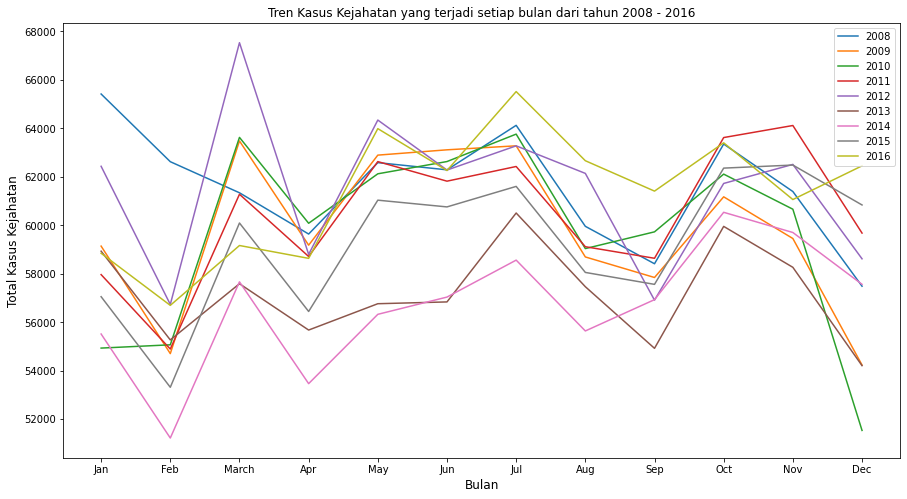

In [20]:
ax = df_crime_year_month[years].plot(figsize=(15,8))
ax.set_xticks(range(0,12))
ax.set_xticklabels(months_name)
ax.legend(loc='upper right')
ax.set_ylabel('Total Kasus Kejahatan', fontsize=12)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_title('Tren Kasus Kejahatan yang terjadi setiap bulan dari tahun 2008 - 2016', fontsize=12)
plt.show()

#### ANALISIS Question 1
***
Ada beberapa hal yang bisa diambil dari grafik di atas. Pada awal tahun setiap tahunnya dari 2008 - 2016, total kasus kejahatan **menurun** di bulan **Januari - Februari**. Kemudian, total kasus kejahatan **naik ke titik yang relatif tinggi** di bulan **Februari - Maret** dan pada bulan **Maret - April** mengalami **penurunan** kembali. <br>
Bulan-bulan berikutnya tren mengalami pasang surut, hingga pada bulan **September** dan **Desember** total kasus kejahatan menyentuh **titik terendahnya**.

### Answer Question 2
***
2. Bagaimana tren jumlah kasus yang terjadi di London dari tahun 2008 - 2016 untuk seluruh wilayah?

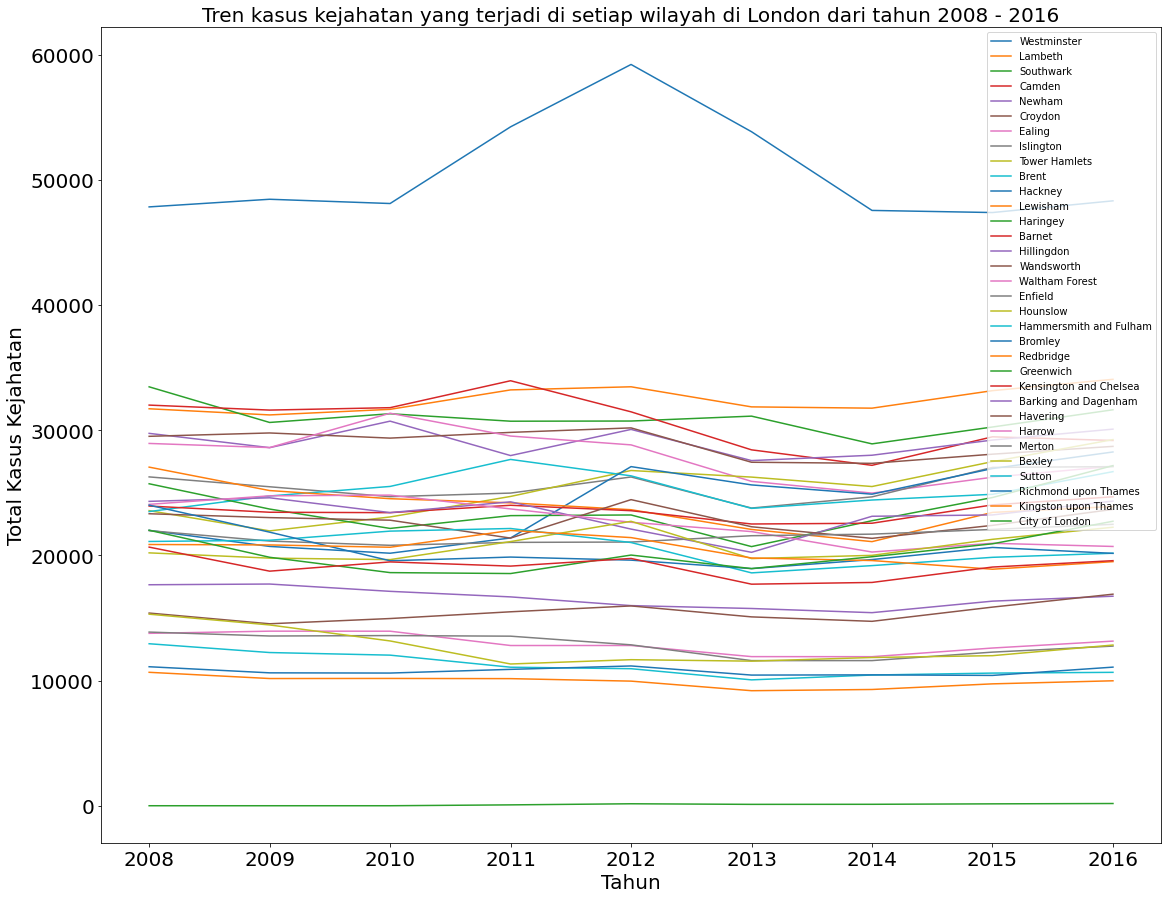

In [24]:
df_crime_boroughs_years[years].transpose().plot(figsize=(19,15))
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Tren kasus kejahatan yang terjadi di setiap wilayah di London dari tahun 2008 - 2016', fontsize=20)
plt.legend(fontsize=10, loc='upper right')
plt.show()

#### ANALISIS Question 2
***
Grafik di atas cukup sulit dilihat untuk semua wilayah yang ada. Namun secara sekilas, **terjadi kenaikan kasus kejahatan** di setiap wilayahnya dari tahun **2014** menuju **2016**. Beberapa wilayah menunjukkan **penurunan kasus kejahatan** dari tahun **2012** menuju **2013**  <br>
Saya akan membuat grafik tren untuk memastikan hal itu dan juga mengambil tren dari lima wilayah dengan total kasus kejahatan tertinggi dari tahun 2008 - 2016!

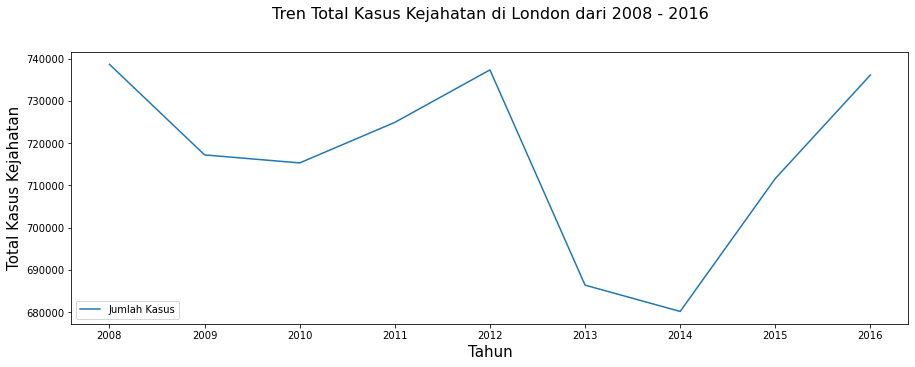

In [25]:
df_loa_sample[['Jumlah Kasus', 'Tahun']].groupby(by='Tahun').sum().plot(figsize=(15, 5))
plt.xlabel('Tahun', fontsize=15)
plt.ylabel('Total Kasus Kejahatan', fontsize=15)
plt.title('Tren Total Kasus Kejahatan di London dari 2008 - 2016', y=1.1,fontsize=16)
plt.legend(loc='lower left')
plt.show()

Terlihat bahwa apa yang saya lihat sekilas memang benar ditunjukkan oleh grafik di atas, bahwa hal yang paling signifikan terjadi **penurunan kasus kejahatan** dari tahun **2012 - 2013** dan terjadi **kenaikan kasus kejahatan** dari tahun **2014-2016**

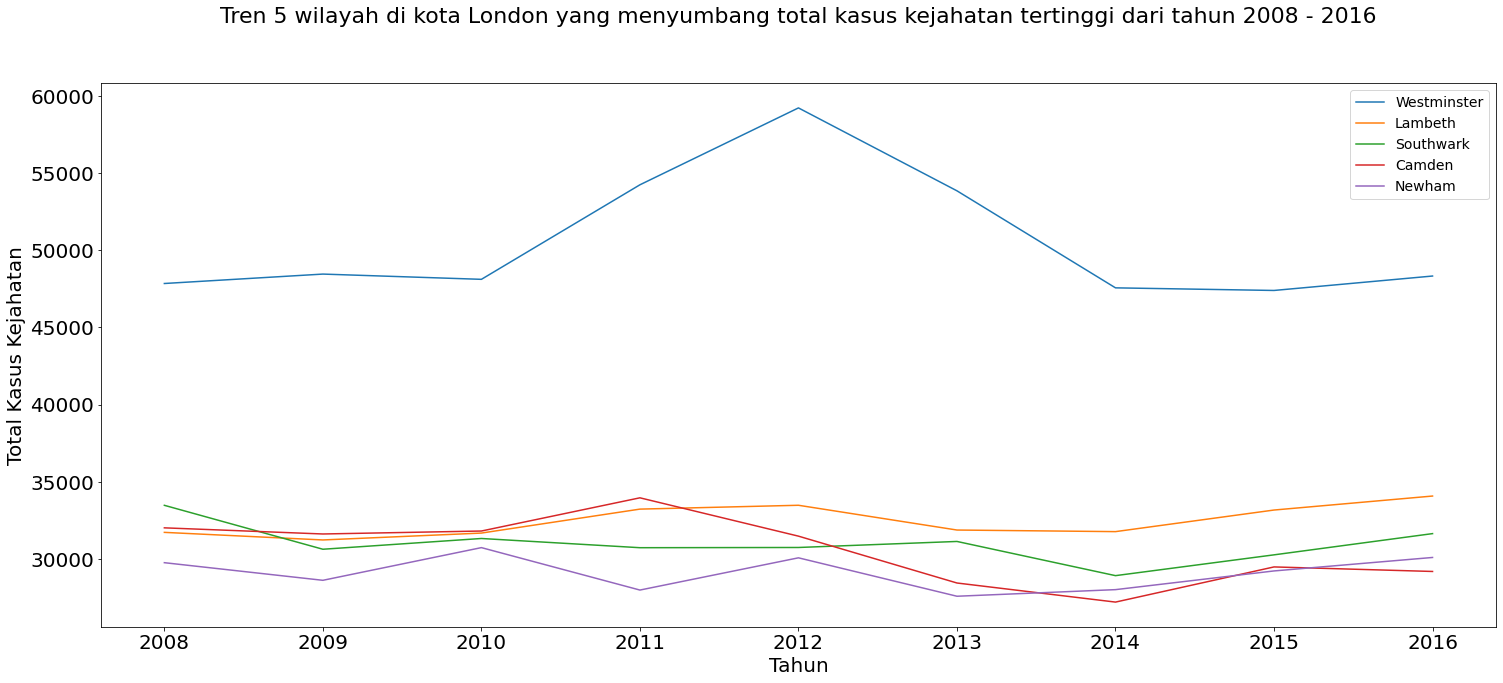

In [26]:
df_crime_boroughs_years[years].head().transpose().plot(figsize=(25, 10))
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Tren 5 wilayah di kota London yang menyumbang total kasus kejahatan tertinggi dari tahun 2008 - 2016', fontsize=22, y=1.1)
plt.legend(fontsize=14)
plt.show()

Wilayah **Westminster** menjadi wilayah dengan **Total Kasus Kejahatan Tertinggi** di London (2008 - 2016). Terjadi peningkatan total kasus kejahatan yang signifikan hanya dalam **2 tahun (2010 - 2012)** dari **sekitar 47.000an** menjadi hampir **60.000** untuk wilayah **Westminster**. Tren peningkatan kasus kejahatan juga diikuti oleh mayoritas daerah lainnya.


## Bar Chart
***
**Questions?** <br>
1. 5 wilayah apa saja yang total kasus kejahatannya paling tinggi dari tahun 2008 - 2016?
2. 5 wilayah apa saja yang total kasus kejahatannya paling rendah dari tahun 2008 - 2016?

### Answer Question 1
***
1. 5 wilayah apa saja yang total kasus kejahatannya paling tinggi dari tahun 2008 - 2016?

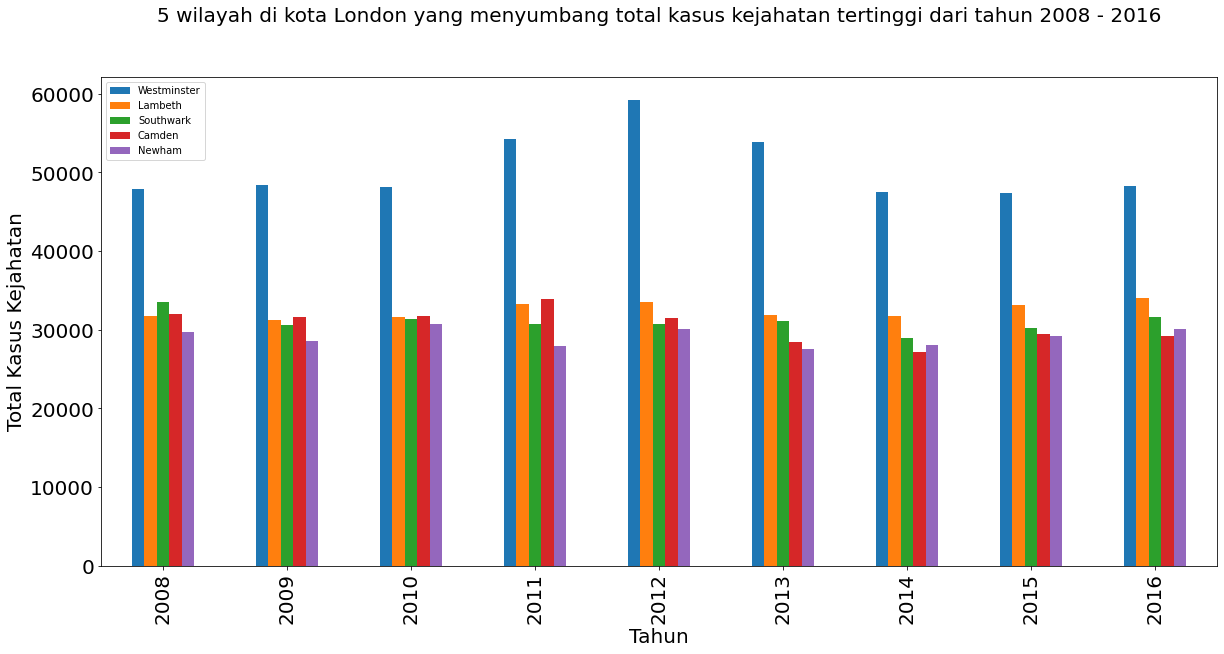

In [27]:
df_crime_boroughs_years[years].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London yang menyumbang total kasus kejahatan tertinggi dari tahun 2008 - 2016', fontsize=20, y=1.1)
plt.show()

#### ANALISIS Question 1
***
Seperti gambar grafik batang di atas, wilayah **Westminster** menjadi wilayah dengan total kasus kejahatan tertinggi dari tahun 2008 - 2016. Selisihnya dengan keempat wilayah lainnya juga relatif cukup jauh rentangnya. <br>
Perlu disiapkan strategi penanganan dari kepolisian di tahun-tahun berikutnya untuk menekan angka kasus kejahatan **khususnya di wilayah Westminster**

### Answer Question 2
***
2. 5 wilayah apa saja yang total kasus kejahatannya paling rendah dari tahun 2008 - 2016?

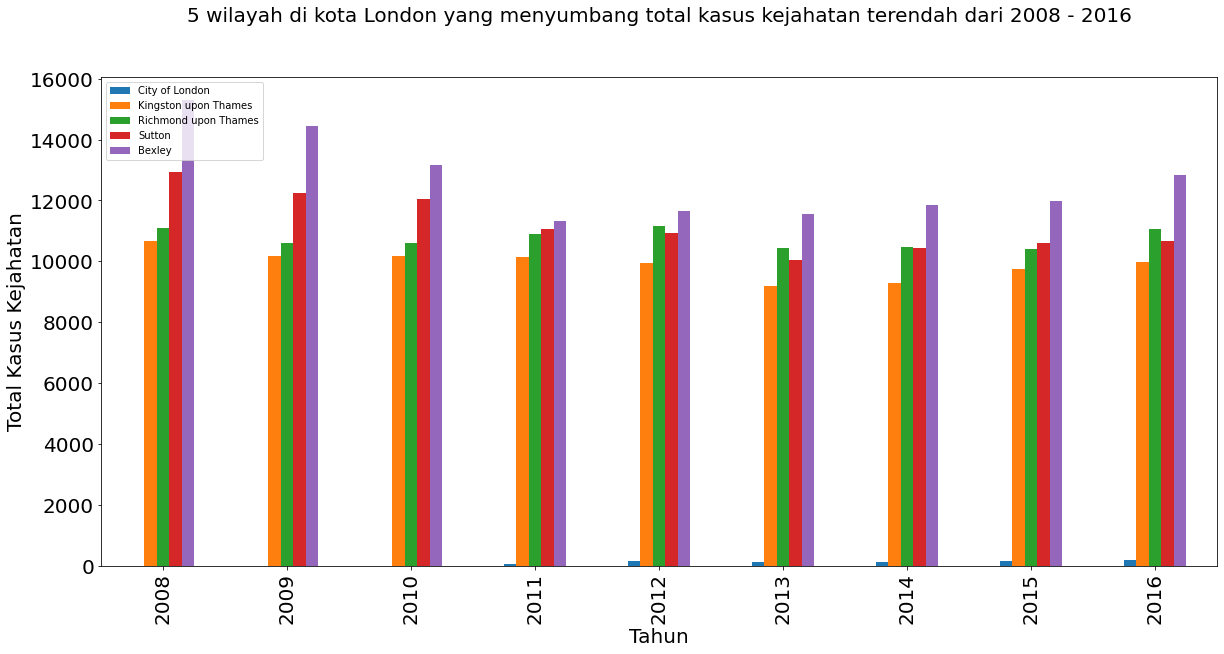

In [28]:
df_crime_boroughs_years.sort_values(by='Total')[years].head().transpose().plot(figsize=(20, 9), kind='bar')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Tahun',fontsize=20)
plt.ylabel('Total Kasus Kejahatan', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('5 wilayah di kota London yang menyumbang total kasus kejahatan terendah dari 2008 - 2016', fontsize=20, y=1.1)
plt.show()

#### ANALISIS Question 2
***
Wilayah **City of London** menjadi wilayah dengan total kasus kejahatan terendah dari tahun 2008 - 2016. Total kasus kejahatannya juga terbilang **sangat rendah** dibandingkan dengan empat wilayah lainnya yang masuk menjadi 5 wilayah dengan total kasus kejahatan terendah. Tampaknya wilayah ini menjadi wilayah yang relatif paling aman. <br>
Perlu diselidiki lokasi dari wilayah ini dengan wilayah dengan total kasus kejahatan tertinggi, apakah berdekatan atau berjauhan?

## Area Chart
***
**Questions?** <br>
1. Bagaimana visualisasi dari 5 kejahatan mayor yang menyumbang total kasus kejahatan tertinggi di London dari tahun 2008 - 2016?

### Answer Question 1
***
1. Bagaimana visualisasi dari 5 kejahatan mayor yang menyumbang total kasus kejahatan tertinggi di London dari tahun 2008 - 2016?

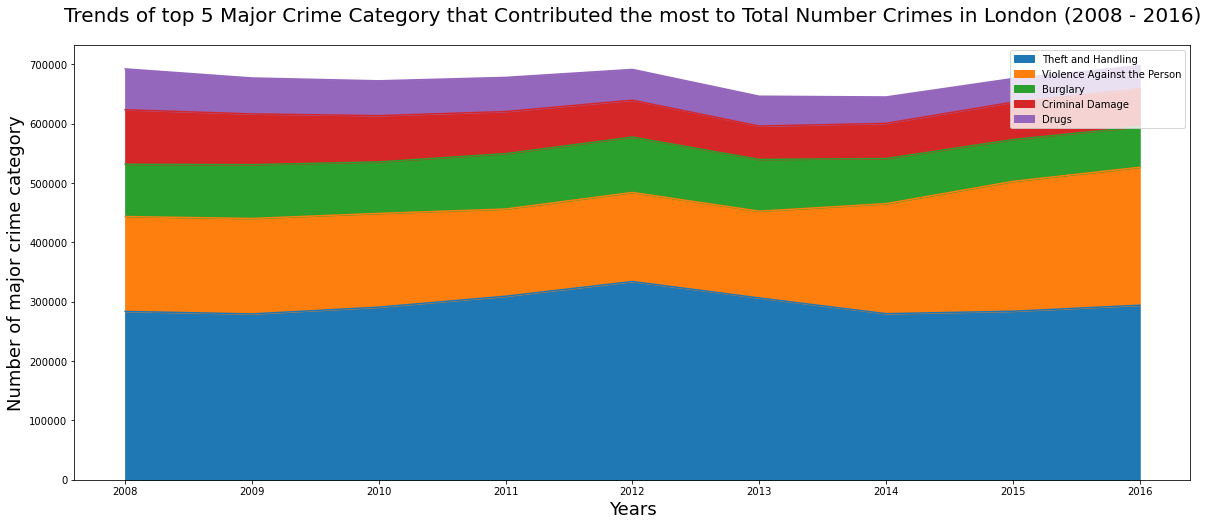

In [29]:
# buat dataframe baru dengan mengambil 5 data teratas yang total kasus kejahatannya tertinggi lalu transpose
df_area = df_crime_majorcat_years[:5][years].transpose()
df_area.plot(
    kind='area',
    stacked=True,
    figsize=(20,8)
)
plt.title('Trends of top 5 Major Crime Category that Contributed the most to Total Number Crimes in London (2008 - 2016)', fontsize=20, y=1.04)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of major crime category', fontsize=18)
plt.legend(loc='upper right', fontsize=10)
plt.show()

#### ANALISIS Question 1
***
Grafik area di atas menunjukkan 5 kategori kejahatan mayor dengan total kasus kejahatan tertinggi yang terjadi di London dari tahun 2008 - 2016. <br>
1. Kita bisa melihat bahwa akumulasi kelima kategori kejahatan mayor ini **cenderung meningkat** dari tahun **2008 - 2012**. Selain itu, dari tahun **2012 - 2013** **cenderung menurun**. Tren **meningkat** mulai terlihat lagi dari tahun **2014 - 2016**
2. Dari kelima kategori kejahatan mayor tersebut, **Theft and Handling** menyumbang paling banyak terhadap total kasus kejahatan yang terjadi di London yang ditandai dengan daerah arsiran yang paling tebal. 
3. Sumbangan **Criminal Damage** dan **Drugs** terhadap akumulasi dari kelimanya ini adalah yang paling sedikit. 
4. Kategori **Violence Against the Person** dalam rentang tahun **2014 - 2016** mengalami **peningkatan** jumlah kasus yang lebih signifikan dibandingkan **Theft and Handling** ditandai dengan gradien arsiran yang lebih curam.
5. Akumulasi ketiganya (Theft and Handling, Violence Against the Person, dan B cenderung menyebabkan angka kasus kejahatan meningkat dari tahun ke tahun.

## Histogram
***
**Questions?** <br>
1. Bagaimana distribusi frekuensi total kasus kejahatan yang terjadi di setiap wilayah di kota London pada setiap tahunnya?

### Answer Question 1
***
1. Bagaimana distribusi frekuensi total kasus kejahatan yang terjadi untuk setiap wilayah di kota London pada setiap tahunnya?

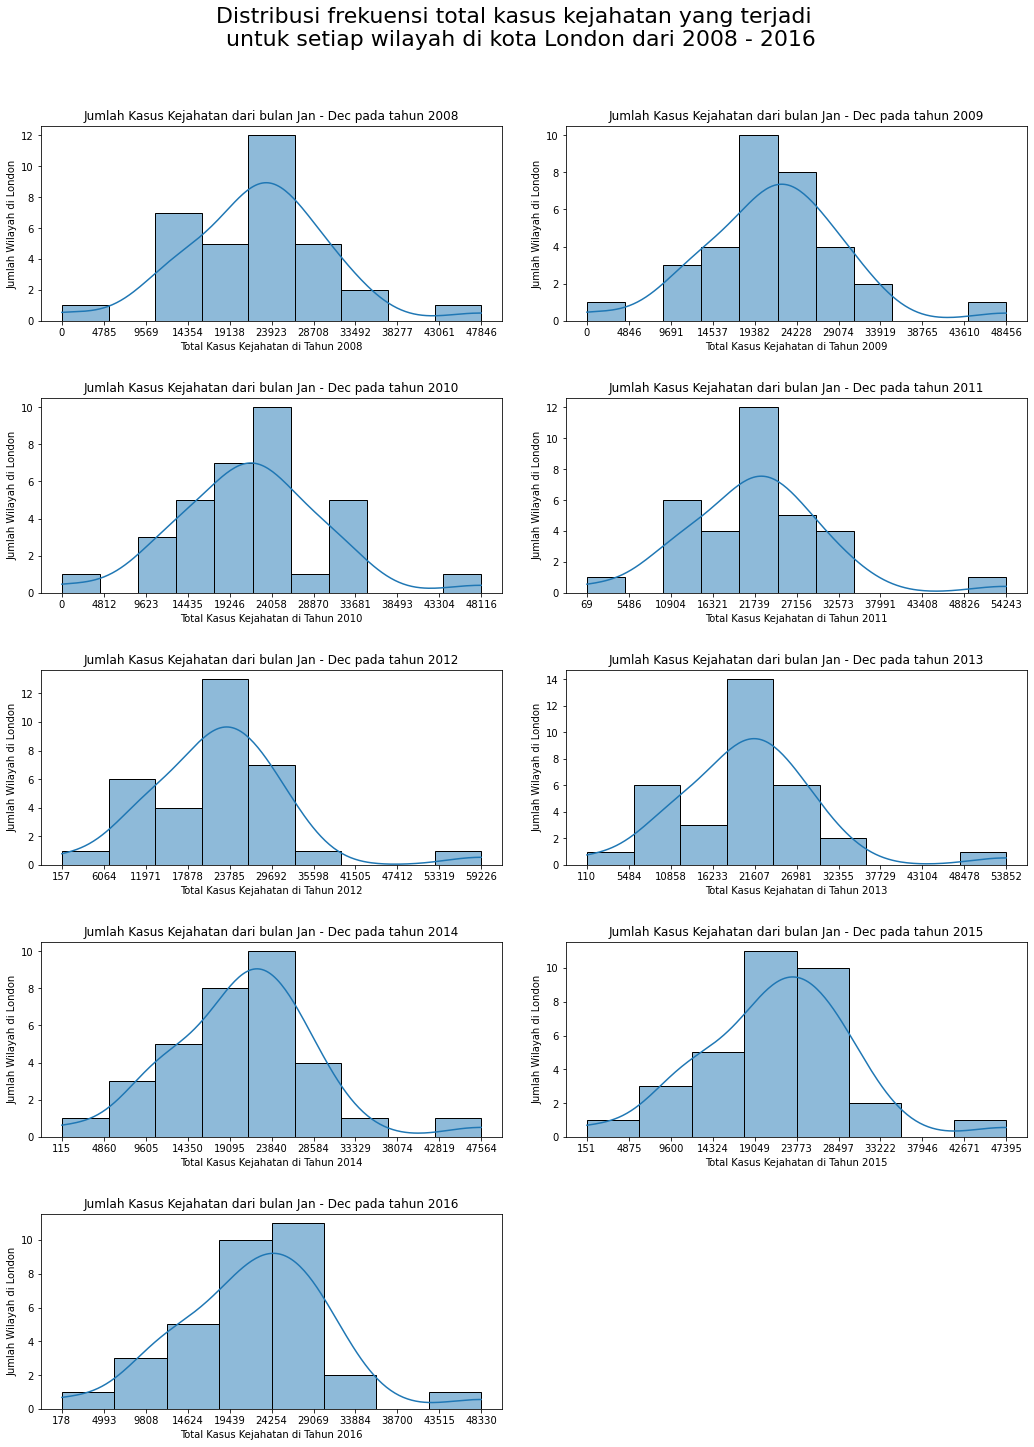

In [30]:
n_rows = int(len(years))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot number dari 1

for tahun in years:
    # hitung bin_edges dari setiap kategori 
    count, bin_edges = np.histogram(df_crime_boroughs_years[years][tahun])
    
    # subplot histogram
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    sns.histplot(df_crime_boroughs_years[years][tahun],kde=True, ax=ax_s[plot_number-1])
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set(xlabel = "Total Kasus Kejahatan di Tahun "+str(tahun), ylabel = "Jumlah Wilayah di London")
    
    # mengatur nilai pada sumbu x dengan masing-masing bin_edges
    ax_s[plot_number-1].set_xticks(bin_edges)
    
    #increment plot_number setiap looping years
    plot_number += 1

fig.suptitle("Distribusi frekuensi total kasus kejahatan yang terjadi \n untuk setiap wilayah di kota London dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

#### ANALISIS Question 1
***
**Analisis Keseluruhan** <br>
1. Mayoritas grafik histogram yang ditampilkan menyerupai bentuk **Bell-Curved** atau **distribusi normal**, walaupun masih belum sempurna karena ada total kasus kejahatan yang nilainya ekstrim dibandingkan lainnya. 
2. Semua grafik tidak ada yang bimodal atau modus ganda.
3. Dari tahun 2008 - 2016 memiliki rata-rata mayoritas total kasus kejahatan pada kisaran sekitar **23.000an - 26.000an** kejadian
4. Nilai ekstrim untuk total kasus kejahatan yang terjadi ditemukan dari tahun **2008 - 2016**. Nilai ekstrim ini bisa dengan lebih detail diketahui dengan menggunakan visualisasi seperti **Boxplot**. Contoh nilai ekstrim yang ada pada histogram ini, seperti ada wilayah dengan total kasus kejahatan yang relatif sangat kecil dari biasanya yaitu pada kisaran **0 - 4.785** kejadian dan ada wilayah dengan total kasus kejahatan yang relatif sangat besar dari biasanya yaitu pada kisaran **43.061 - 47.46** kejadian pada tahun **2008**

## Box Plot
***
**Questions?** <br>
1. Bagaimana representasi statistik dari distribusi total kasus kejahatan yang terjadi untuk setiap wilayah di kota London pada setiap tahunnya?

### Answer Question 1
***
1. Bagaimana representasi statistik dari distribusi total kasus kejahatan yang terjadi untuk setiap wilayah di kota London pada setiap tahunnya?

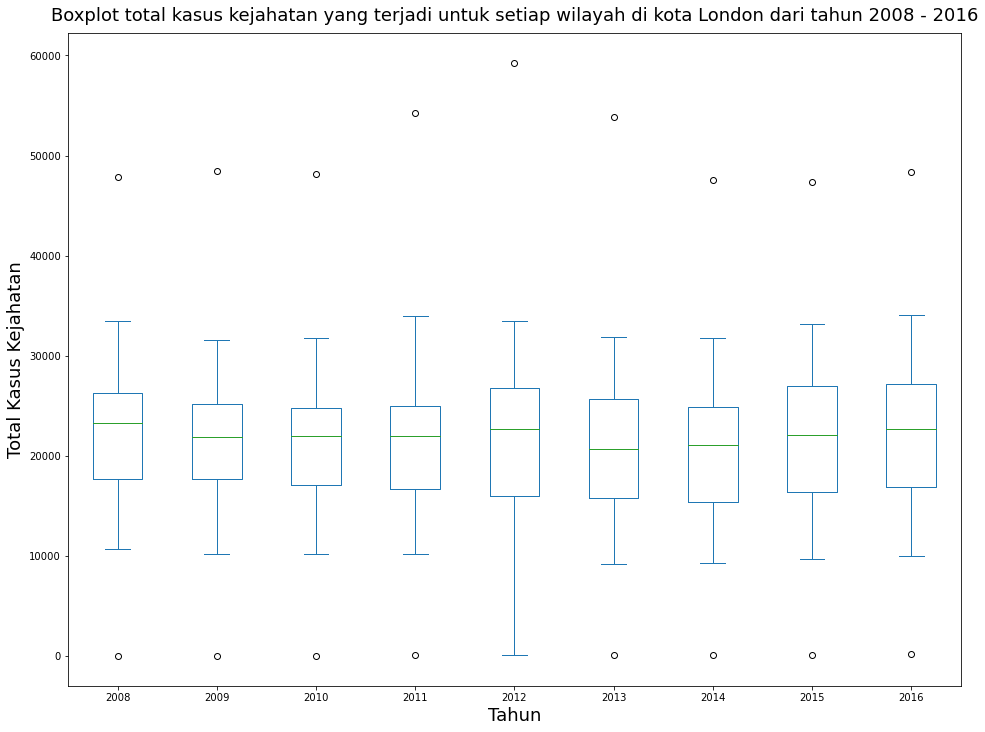

In [31]:
df_crime_boroughs_years[years].plot(
    kind='box',
    figsize=(16,12),
)
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Total Kasus Kejahatan', fontsize=18)
plt.title('Boxplot total kasus kejahatan yang terjadi untuk setiap wilayah di kota London dari tahun 2008 - 2016',  fontsize=18, y=1.01)
plt.show()

#### ANALISIS Question 1
***
Ada beberapa hal yang bisa dianalisis dari grafik boxplot di atas. 
1. Grafik di atas mempertegas dan memperjelas visualisasi histogram yang sudah dibuat sebelumnya, dimana pada setiap tahunnya  rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar **23.000an - 26.000an** kejadian.
2. Range total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip, **kecuali 2012**. Range total kasus kejahatan pada tahun **2012** lebih tersebar dibandingkan tahun-tahun lainnya.
3. Melalui boxplot ini juga akan mengonfirmasi adanya total kasus kejahatan dengan nilai yang ekstrim. Nilai esktrim ini ditemukan dari rentang tahun 2008 - 2016. Wilayah **City of London** menjadi wilayah yang relatif tentram dengan total kasus kejahatan setiap tahunnya berada kurang dari (Q1 - 1.5x(Q3-Q1)), sehingga pada boxplot muncul sebagai *outliers* (ditandai dengan simbol lingkaran). Wilayah **Westminster** menjadi wilayah yang kriminalitasnya relatif tinggi dengan total kasus kejahatan setiap tahunnya berada lebih dari (Q3 + 1.5x(Q3-Q1)), sehingga pada boxplot muncul sebagai *outliers*

## Pie Chart
***
**Questions?** <br>
1. Bagaimana persentase kejahatan mayor yang terjadi dari tahun 2008 - 2016? Apa 3 kejahatan mayor yang menyumbang total kasus kejahatan tertinggi pada rentang tahun tersebut?

### Answer Question 1
***
1. Bagaimana persentase kejahatan mayor yang terjadi dari tahun 2008 - 2016? Apa 3 kejahatan mayor yang menyumbang total kasus kejahatan tertinggi pada rentang tahun tersebut?

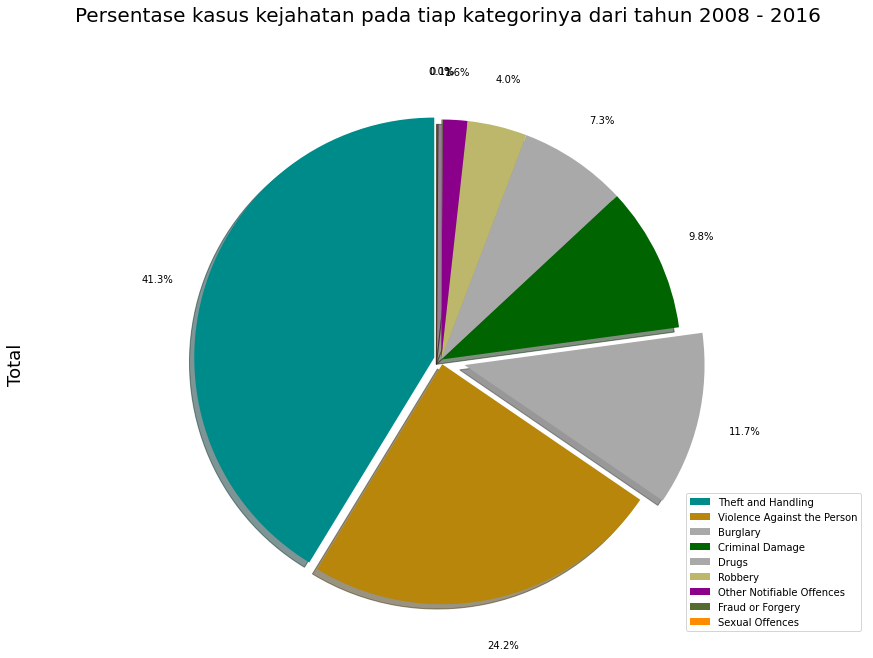

In [32]:
# ratio for each category crime with which to offset each wedge.
explode_list = [0.03, 0.02, 0.1, 0, 0, 0, 0, 0, 0]
df_pie = df_crime_majorcat_years['Total']
df_pie.plot(kind='pie',
            figsize=(15, 10),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,         # turn off labels on pie chart
            pctdistance=1.2,# the ratio between the center of each pie slice and the start of the text generated by autopct
            colors=colors_list,  # add custom colors
            explode=explode_list  # 'explode' top 3 major_category
            )

# scale the title up by 12% to match pctdistance
plt.title('Persentase kasus kejahatan pada tiap kategorinya dari tahun 2008 - 2016', y=1.12, fontsize=20)
plt.ylabel('Total',fontsize=18)
plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index.values, loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

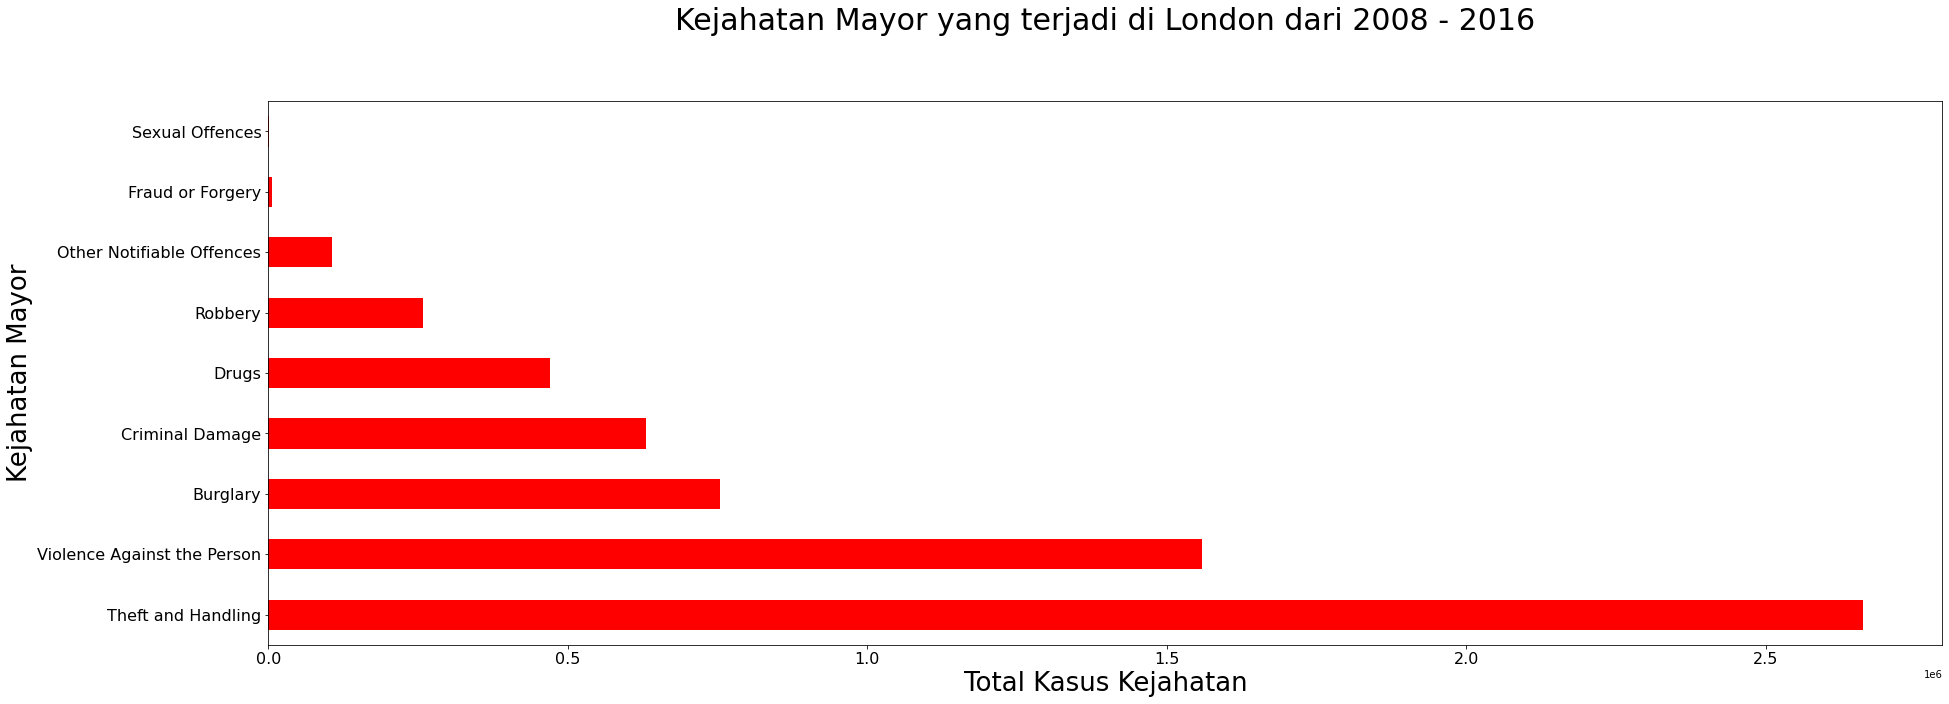

In [33]:
df_crime_majorcat_years['Total'].plot(
    kind='barh', 
    figsize=(30,10),
    color='red'
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Kejahatan Mayor yang terjadi di London dari 2008 - 2016', fontsize=30, y=1.12)
plt.xlabel('Total Kasus Kejahatan', fontsize=26)
plt.ylabel('Kejahatan Mayor', fontsize=26)
plt.show()

#### ANALISIS Question 1
***
**Theft and Handling; Violence Against the Person; Burglary** menjadi tiga kategori kejahatan mayor yang menyumbang total kasus kejahatan dengan **persentase tertinggi** dari tahun 2008 - 2016. Rincian masing-masing kategori mayor tersebut adalah sebagai berikut: <br>
1. Theft and Handling sebesar **41,3%** dengan total kasus kejahatan **2.661.861**
2. Violence Against the Person sebesar **24,2%** dengan total kasus kejahatan **1.558.081**
3. Burglary sebesar **11,7%** dengan total kasus kejahatan **754.293** <br>

## Scatter Plot
***
**Questions?** <br>
1. Bagaimana hubungan antara kasus kejahatan yang terjadi pada setiap bulan dari tahun 2008 - 2016?

### Answer Question 1
***
1. Bagaimana hubungan antara kasus kejahatan yang terjadi pada setiap bulan dari tahun 2008 - 2016?
2. Bagaimana tren total kasus kejahatan yang terjadi dari tahun ke tahun (2008 - 2016)?

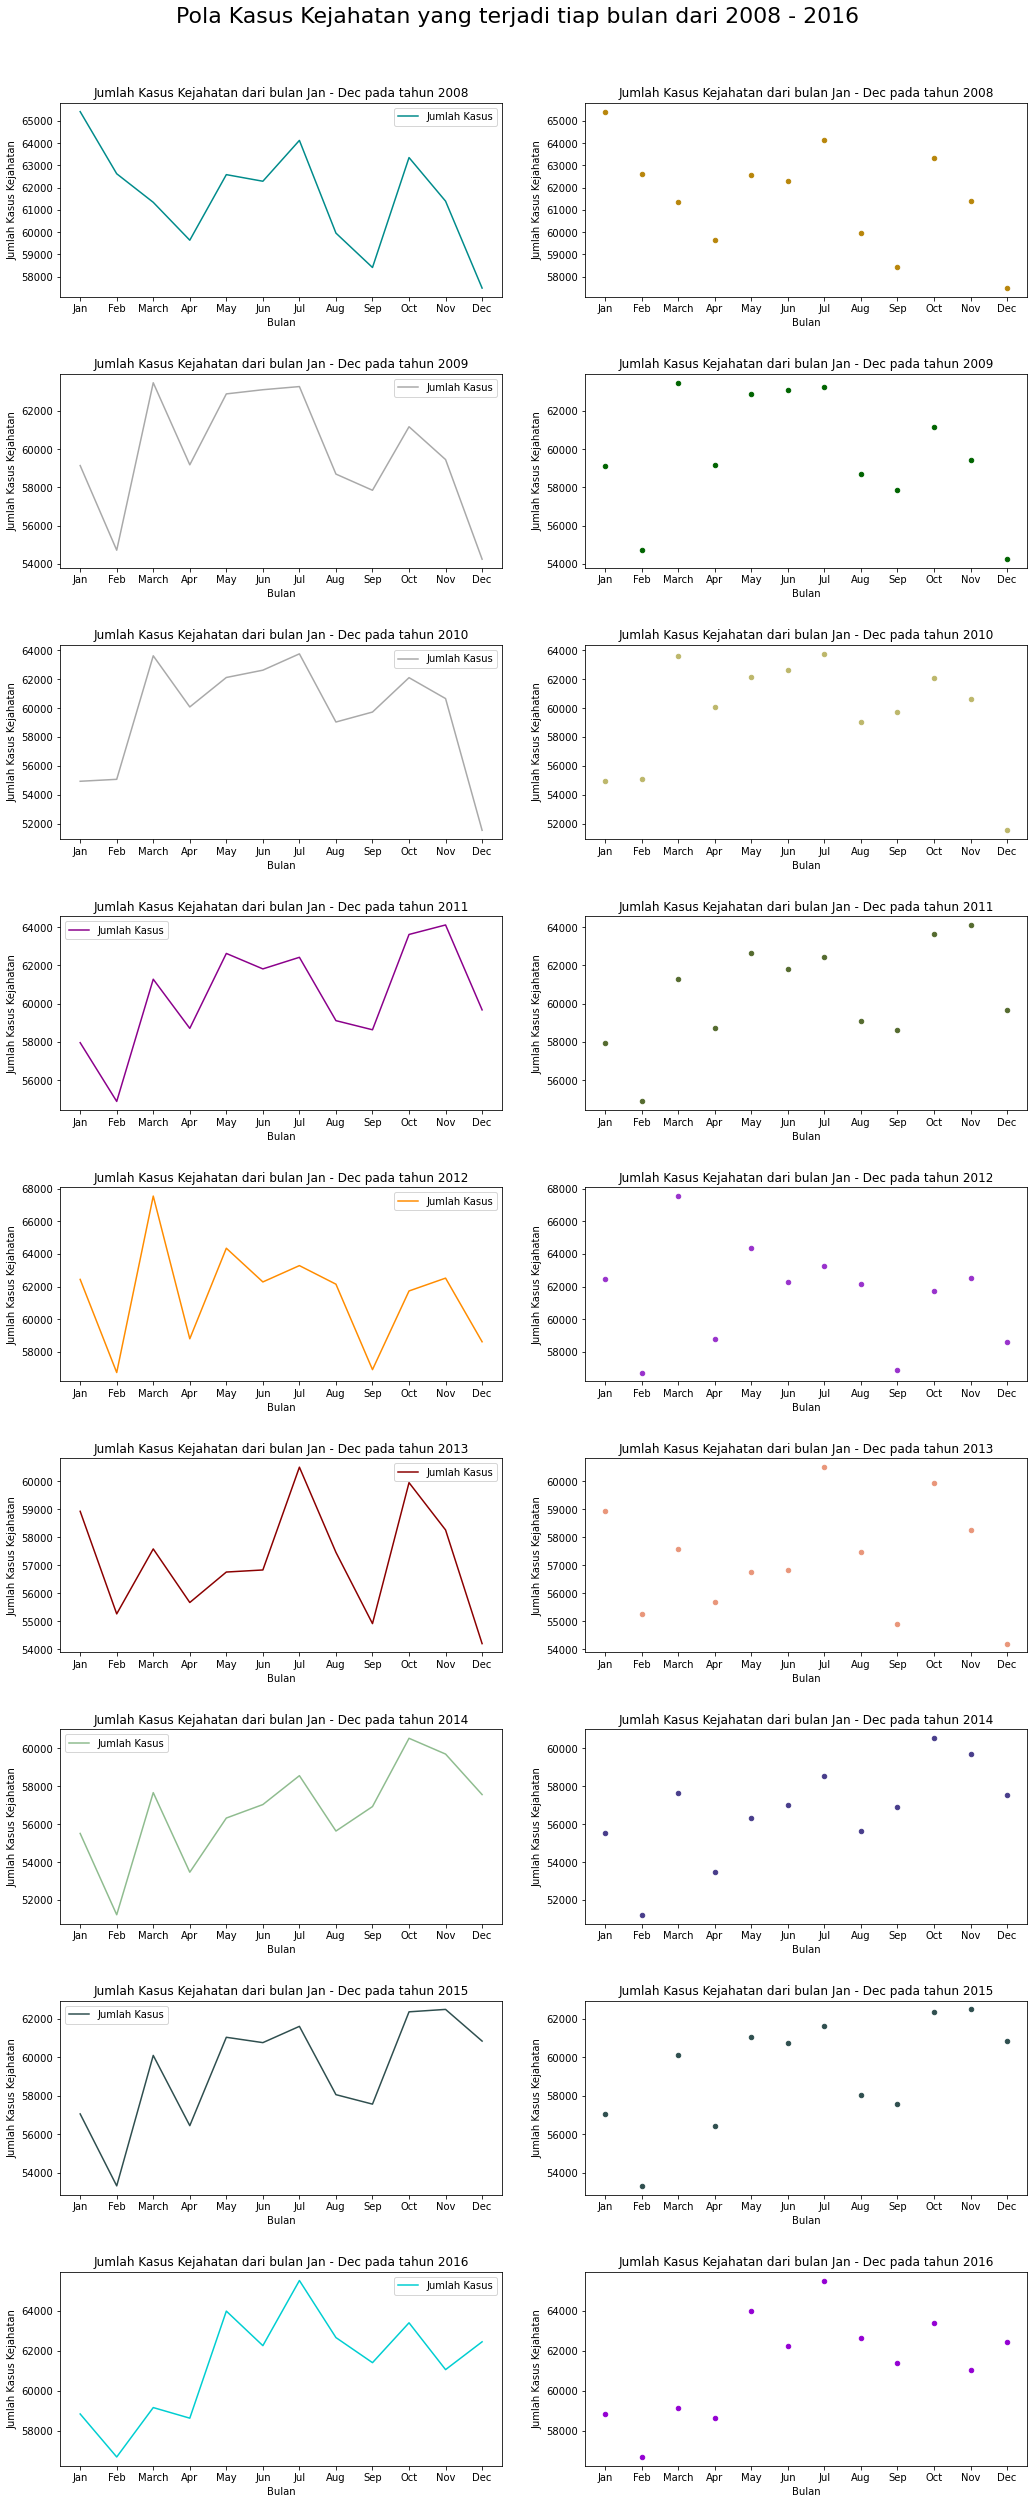

In [34]:
n_rows = int(len(years))
n_cols = 2

fig = plt.figure(figsize=(15, 35)) # membuat figure untuk menampung subplot
ax_s = [] #menampung ax untuk setiap subplot

plot_number = 1 #inisialisasi plot_number subplot dari 1

for tahun in years:
    #subplot line plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    
    #ambil data pada tahun tertentu, group berdasarkan bulan lalu sum 'Jumlah Kasus'-nya
    df = df_loa_sample[
        (df_loa_sample['Tahun'] == tahun)
    ][['Bulan', 'Jumlah Kasus']].groupby('Bulan').sum()
    
    #plotting
    df.plot(
        kind='line',
        ax=ax_s[plot_number-1],
        color=colors_list[plot_number-1]
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    ax_s[plot_number-1].set_xticks(months)
    ax_s[plot_number-1].set_xticklabels(months_name)
    plot_number += 1
    
    # subplot scatter plot
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    df.reset_index(inplace=True)
    df.columns = ['Bulan', 'Jumlah Kasus']
    df.plot(
        kind='scatter',
        x='Bulan',
        y='Jumlah Kasus',
        ax=ax_s[plot_number-1],
        color=colors_list[plot_number-1]
    )
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set_xlabel('Bulan')
    ax_s[plot_number-1].set_ylabel('Jumlah Kasus Kejahatan')
    # mengubah index dan labels pada sumbu x agar diganti menjadi nama bulan
    ax_s[plot_number-1].set_xticks(months)
    ax_s[plot_number-1].set_xticklabels(months_name)
    
    #increment plot_number in each itteration
    plot_number += 1

fig.suptitle("Pola Kasus Kejahatan yang terjadi tiap bulan dari 2008 - 2016", y=1, fontsize=22)
fig.tight_layout(pad=3.0)  # giving padding between plot in subplot
plt.show()

#### ANALISIS Question 1
***
Terdapat pola yang menarik dari kasus kejahatan yang terjadi. 
1. Dari tahun 2008 - 2016, **mayoritas** kasus kejahatan terjadi **penurunan** dari bulan **Januari - Februari** dan terjadi **peningkatan** dari bulan **Februari - Maret**. Peningkatannya juga terbilang relatif tinggi dalam rentang tahun **2009 - 2012, 2014** yang rata-rata peningkatannya lebih dari **5000an** kasus hanya dalam sebulan. 
2. Dalam rentang 1 bulan dari **Maret - April**, terjadi **penurunan** pada kasus kejahatan. Penurunannya terbilang relatif tinggi dalam rentang tahun tersebut mulai dari **4000an** sampai **8000an** penurunan kasus.
3. Dalam rentang **April - Oktober** kasus kejahatan mengalami **fluktuasi** kadang naik dan kadang turun.
4. Dalam interval **Oktober - Desember** kasus kejahatan kembali mengalami **penurunan** hampir mayoritas di setiap tahun dari tahun **2008 - 2016**


## Word Cloud
***
**Questions?** <br>
1. Tampilkan word cloud untuk kejahatan mayor yang terjadi pada tahun 20016!

### Answer Question 1
***
1. Tampilkan word cloud untuk kejahatan mayor yang terjadi pada tahun 20016!

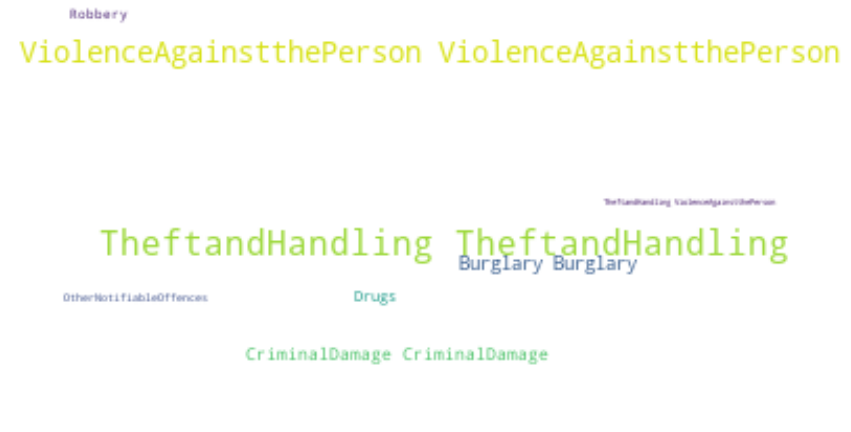

In [35]:
#buat dataframe baru yang mengambil data yang tahunnya 2016, lalu dipilih hanya kolom 'Kejahatan Mayor' dan 'Jumlah Kasus'
df_word_cloud = df_loa_sample[
    df_loa_sample['Tahun']==2016
][['Kejahatan Mayor','Jumlah Kasus']]

# Menghapus spasi yang terdapat pada Kejahatan Mayor
df_word_cloud['Kejahatan Mayor'] = df_word_cloud['Kejahatan Mayor'].apply(lambda x: ''.join(x.split()))

# menjumlahkan total kasus kejahatan berdasarkan "Kejahatan Mayor"
df_word_cloud = df_word_cloud.groupby('Kejahatan Mayor').sum()
df_word_cloud.index.name = None

# hitung sum dari 'Jumlah Kasus'
total_keseluruhan_kasus = df_word_cloud['Jumlah Kasus'].sum()

# mengatur kata maksimum untuk proporsi dalam word cloud
max_words = 100

#inisialisasi string kosong untuk menampung cloning 'Kejahatan Mayor' sebanyak persentasenya
word_string = ''

#lakukan perulangan untuk setiap 'Kejahatan Mayor' yang ada
for crime_cat in df_word_cloud.index.values:
    # lakukan copy string 'Kejahatan Mayor' sebesar proporsinya terhadap keseluruhan kasus
    repeat_num_crime_cat = int(
        df_word_cloud.loc[crime_cat, 'Jumlah Kasus']/float(total_keseluruhan_kasus)*max_words)
    # concat ke word_string sejumlah repeat_num_crime_cat
    word_string = word_string + ((crime_cat + ' ') * repeat_num_crime_cat)

# Instansiasi objek WordCloud dengan warna background putih
crime_category_word_cloud = WordCloud(
    background_color='white'
)
#generate word_string ke dalam objek Word CLoud
crime_category_word_cloud.generate(word_string)

fig = plt.figure() #buat figure
fig.set_figwidth(15) #setting lebar figure
fig.set_figheight(18) #setting tinggi figure

# Display the word cloud
plt.imshow(crime_category_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium Map of London
***
**Questions?** <br>
1. Gambarkan peta London dengan zoom start = 9!

### Answer Question 1
***
1. Gambarkan peta London dengan zoom start = 9!

In [36]:
# setting latitude and longitude for London Maps
london_lattitude = 51.509865
london_longitude = -0.118092

# Instansiasi objek Folium.Map
london_map = folium.Map(
    location=[london_lattitude, london_longitude],
    zoom_start=9
)

# display London Map
london_map

# Overall Analysis
***
Informasi yang bisa diambil setelah melakukan analisis terhadap data LSOA adalah: <br>
1. Dalam rentang tahun 2008 sampai 2016, tindakan kejahatan cenderung meningkat pada bulan Maret dan Oktober, sedangkan pada bulan Februari, September, dan Desember tindakan kejahatan cenderung menurun. 
2. Wilayah Westminster menjadi wilayah di London dengan angka kriminalitas tertinggi dan wilayah City of London menjadi wilayah dengan angka kriminalitas terendah dalam rentang tahun 2008 - 2016.
3. Rata-rata total kasus kejahatan yang terjadi untuk seluruh wilayah di London berada dalam kisaran sekitar 23.000an - 26.000an kejadian dalam rentang tahun 2008 - 2016.
4. Kasus kejahatan *Theft and Handling* paling sering terjadi, sedangkan kasus kejahatan *Sexual Offences* sangat jarang terjadi di kota London dalam rentang 2008 - 2016.
5. Kasus kejahatan *Violence Against the Person* mengalami peningkatan yang lebih signifikan dibandingkan *Theft and Handling* pada tahun 2014 sampai 2016 di kota London 